In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [4]:
#한글 깨짐 방지
from matplotlib import rc, font_manager
font_path='data/fonts/malgun.ttf'
font_name=font_manager.FontProperties(fname=font_path).get_name()
rc('font',family=font_name)
#마이너스 깨짐 방지
plt.rcParams['axes.unicode_minus']=False

In [10]:
# 데이터 불러오기
mackerel_output=pd.read_csv('./data/mackerel/부산_고등어_생산량(선어).csv',encoding='cp949')
temperature_jung=pd.read_csv('./data/temperature/207정선_월별.csv')
temperature_jung_output=pd.merge(temperature_jung,mackerel_output,on=['년도','월'])
temperature_jung_output.iloc[:,2:].corr()

,수온,염분,용존산소,기압,평균 풍속(m/s),평균 상대습도(%),평균 기온(°C),생산량
수온,1.000000,-0.699160,-0.680339,-0.078483,-0.010829,0.252957,0.627345,0.340051
염분,-0.699160,1.000000,0.601768,0.119246,0.113514,-0.385746,-0.693252,-0.218720
용존산소,-0.680339,0.601768,1.000000,-0.067769,-0.070062,-0.025505,-0.424999,-0.431504
기압,-0.078483,0.119246,-0.067769,1.000000,0.268688,-0.345850,-0.317081,0.239137
평균 풍속(m/s),-0.010829,0.113514,-0.070062,0.268688,1.000000,-0.508148,-0.394273,0.182802
평균 상대습도(%),0.252957,-0.385746,-0.025505,-0.345850,-0.508148,1.000000,0.809578,-0.389814
평균 기온(°C),0.627345,-0.693252,-0.424999,-0.317081,-0.394273,0.809578,1.000000,-0.109760
생산량,0.340051,-0.218720,-0.431504,0.239137,0.182802,-0.389814,-0.109760,1.000000


In [8]:
month_temperature_jung=temperature_jung_output[temperature_jung_output['월']==7]
month_temperature_jung=month_temperature_jung.reset_index().drop(columns='index')
month_temperature_jung.iloc[:,2:].corr()

,수온,염분,용존산소,기압,평균 풍속(m/s),평균 상대습도(%),평균 기온(°C),생산량
수온,1.000000,-0.765219,0.147815,0.009752,0.609254,-0.453641,-0.365439,0.329247
염분,-0.765219,1.000000,-0.280486,0.288221,-0.629583,0.437812,0.435371,-0.070852
용존산소,0.147815,-0.280486,1.000000,-0.440209,0.231448,-0.083089,-0.268622,0.267192
기압,0.009752,0.288221,-0.440209,1.000000,-0.051625,0.168225,0.192418,0.048183
평균 풍속(m/s),0.609254,-0.629583,0.231448,-0.051625,1.000000,-0.542481,-0.390563,0.062702
평균 상대습도(%),-0.453641,0.437812,-0.083089,0.168225,-0.542481,1.000000,0.061439,-0.173543
평균 기온(°C),-0.365439,0.435371,-0.268622,0.192418,-0.390563,0.061439,1.000000,-0.031755
생산량,0.329247,-0.070852,0.267192,0.048183,0.062702,-0.173543,-0.031755,1.000000


In [27]:
# 데이터 표준화
scaler_x=StandardScaler()
scaler_x.fit_transform(month_temperature_jung.iloc[:,2:])
test=scaler_x.transform(month_temperature_jung.iloc[:,2:])
standard_data_jung=pd.DataFrame(test)

In [28]:
standard_data_jung.rename(columns={0:'수온',1:'염분',2:'용존산소',3:'기압',4:'생산량'}, inplace=True)
standard_data_jung

,수온,염분,용존산소,기압,생산량
0,-1.876324,1.896686,-0.296829,0.369991,-0.167927
1,1.530098,-1.941845,-0.753575,-0.118397,-0.213356
2,-1.373737,0.240849,-0.208355,0.547587,-0.969080
3,0.217788,0.692441,0.612942,-0.207195,-1.049784
4,0.497003,-0.662335,1.148350,-1.183971,1.691989
5,-1.066601,-0.041396,1.148350,-2.915529,-0.084551
6,1.278804,-0.888131,0.084977,-1.095173,-0.056225
7,1.334647,-1.659600,1.293325,0.458789,0.698965
8,-0.731543,0.316114,-0.833252,0.547587,0.074717
9,-0.061427,1.144033,-0.010939,0.991576,0.919696


In [29]:
standard_data_jung['년도']=month_temperature_jung['년도']
standard_data_jung['월']=month_temperature_jung['월']
standard_data_jung

,수온,염분,용존산소,기압,생산량,년도,월
0,-1.876324,1.896686,-0.296829,0.369991,-0.167927,2008,7
1,1.530098,-1.941845,-0.753575,-0.118397,-0.213356,2009,7
2,-1.373737,0.240849,-0.208355,0.547587,-0.969080,2010,7
3,0.217788,0.692441,0.612942,-0.207195,-1.049784,2011,7
4,0.497003,-0.662335,1.148350,-1.183971,1.691989,2012,7
5,-1.066601,-0.041396,1.148350,-2.915529,-0.084551,2013,7
6,1.278804,-0.888131,0.084977,-1.095173,-0.056225,2014,7
7,1.334647,-1.659600,1.293325,0.458789,0.698965,2015,7
8,-0.731543,0.316114,-0.833252,0.547587,0.074717,2016,7
9,-0.061427,1.144033,-0.010939,0.991576,0.919696,2017,7


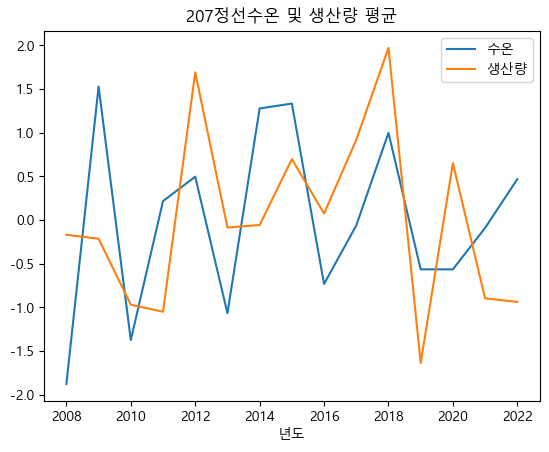

In [37]:
# 207정선수온 및 생산량 평균
plt.figure()


plt.title('207정선수온 및 생산량 평균')
plt.xlabel('년도')
plt.plot(standard_data_jung['년도'],standard_data_jung['수온'],label='수온')
plt.plot(standard_data_jung['년도'],standard_data_jung['생산량'],label='생산량')
plt.legend()
plt.show()

In [ ]:
# 수온 - 0 / 생산량 - 1
plt.figure()


plt.title('207정선수온 및 생산량 평균')
plt.xlabel('년도')
plt.plot(standard_data_jung['년도'],standard_data_jung['수온'],label='수온')
plt.plot(standard_data_jung['년도'],standard_data_jung['생산량'],label='생산량')
plt.legend()
plt.show()